# Proximity analysis

Proximity analysis tools help you answer one of the most common questions posed in spatial analysis: What is near what?

Proximity tools are available under the sub module `use_proximity` in the `features` module of the API. This section of the guide talks about using two tools from this module - create buffers and plan routes

## Create buffers

The Create Buffers tool creates areas around input point, line, or area features to a specified distance. Running this tool creates output polygon layers of specified radius. This tool is often used with overlay analysis to answer questions such as 'What falls within 5 mile radius of this school?'. Refer [here](http://doc.arcgis.com/en/arcgis-online/use-maps/create-buffers.htm) for more details on this tool.

In the examaple below, let us create buffers of 50 mile radius around major ports in the west coast of USA

<Item title:"Ports along west coast" type:Feature Service owner:arcgis_python_api>
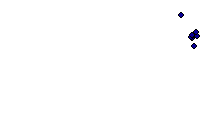

In [ ]:
# connect to GIS
from arcgis.gis import GIS
gis = GIS("portal url", "username", "password")
ports_item = gis.content.get("b0cb0c9f63e74e8480af0286eb9ac01f")
ports_item

Let us render these ports on a map

In [ ]:
map1 = gis.map('USA')
map1

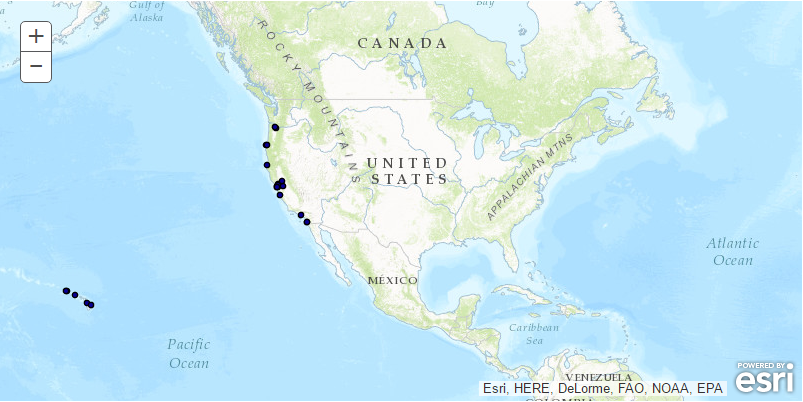</img>

In [ ]:
map1.add_layer(ports_item)

### Buffer a fixed distance
Access `create_buffers` from `use_proximity` sub module

In [ ]:
from arcgis.features import use_proximity

#access the first layer in ports_item
ports_layer1 = ports_item.layers[0]
ports_buffer50 = use_proximity.create_buffers(ports_layer1, distances=[50], units = 'Miles')

Submitted.
Executing...


A buffer of 50 miles around each of these ports has been created

In [ ]:
type(ports_buffer50)

arcgis.features.feature.FeatureCollection

`ports_buffer50` is an in memory feature collection and has not been persisted as an item on the portal because we did not specify `output_name` parameter to the tool.

Let us add the result to a new map

In [ ]:
map2 = gis.map('USA')
map2

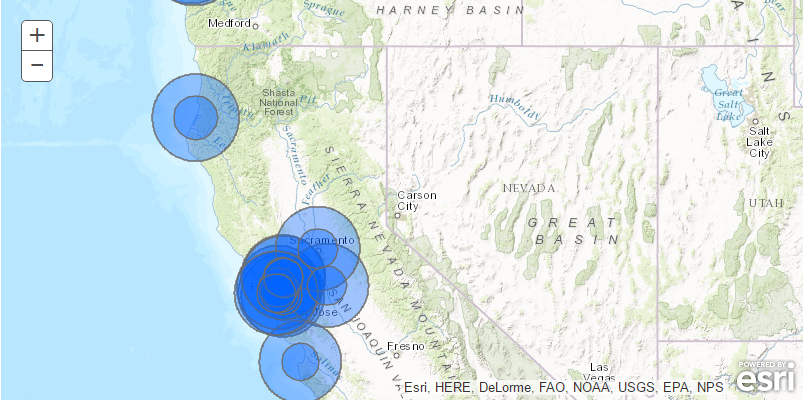</img>

In [ ]:
map2.add_layer(ports_buffer50)

### Buffer based on a numerical field
Sometimes, it makes sense to vary the buffered distance by a field on the layer. For instance, when creating buffers around hazardous sites, you may want to vary the distance by the type or quantity of materials held in the facility.
Such kinds of buffers can be created by specifying a numerical field to the `field` parameter. Let us query all the fields on this layer and determine which can be used

In [ ]:
ports_layer1.properties.fields

[{
   "nullable": false,
   "name": "objectid",
   "alias": "objectid",
   "type": "esriFieldTypeOID",
   "domain": null,
   "editable": false
 }, {
   "nullable": true,
   "name": "port_name",
   "alias": "port_name",
   "type": "esriFieldTypeString",
   "domain": null,
   "length": 8000,
   "editable": true
 }, {
   "nullable": true,
   "name": "country",
   "alias": "country",
   "type": "esriFieldTypeString",
   "domain": null,
   "length": 8000,
   "editable": true
 }, {
   "nullable": true,
   "name": "longitude",
   "alias": "longitude",
   "type": "esriFieldTypeDouble",
   "domain": null,
   "editable": true
 }, {
   "nullable": true,
   "name": "latitude",
   "alias": "latitude",
   "type": "esriFieldTypeDouble",
   "domain": null,
   "editable": true
 }, {
   "nullable": true,
   "name": "harborsize",
   "alias": "harborsize",
   "type": "esriFieldTypeString",
   "domain": null,
   "length": 8000,
   "editable": true
 }, {
   "nullable": true,
   "name": "label_position",
   

`latitude` seems to be a suitable field. This time, let us store the result on the portal

In [ ]:
ports_buffer_lat = use_proximity.create_buffers(ports_layer1,
                                                     field='latitude',
                                                     units='kilometers',
                                                     output_name='ports_buffers_lat1')

Submitted.
Executing...


In [ ]:
type(ports_buffer_lat)

arcgis.gis.Item

In [ ]:
ports_buffer_lat

<Item title:"ports_buffers_lat1" type:Feature Service owner:arcgis_python_api>

Thus, an item has been created on the portal storing the result. Let us add this back to the map. Scroll above to see the result

In [ ]:
map2.add_layer(ports_buffer_lat)

# Plan routes
Plan Routes determines how a fleet of vehicles can visit a set of stops in the least amount of time. The plan routes tool is versatile and can be used to plan either a simple route direction or plan the travel of a fleet of vehicles. To learn more about this tool visit the [tool documentation](http://doc.arcgis.com/en/arcgis-online/use-maps/plan-routes.htm)

In the example below, we will observe how to plan a simple route for tourists when they visit major attractions in Los Angeles. Our stops would be [Universal studios](https://en.wikipedia.org/wiki/Universal_Studios_Hollywood), [Griffith observatory](https://en.wikipedia.org/wiki/Griffith_Observatory), [Disneyland amusement park](https://en.wikipedia.org/wiki/Disneyland), [Hollywood walk of fame](https://en.wikipedia.org/wiki/Hollywood_Walk_of_Fame) and back to [Los Angeles international airport](https://en.wikipedia.org/wiki/Los_Angeles_International_Airport).

At a minimum the plan routes tool accepts a stop layer, start layer, route count and the maximum number of stops per route.

In [ ]:
# search for a feature layer containing the attractions and destination.
stops_item = gis.content.search("LA_tourism_stops", "Feature Collection", max_items=1)[0]
airport_item = gis.content.search("LAX_airport", "Feature Collection", max_items=1)[0]

Let us add the attractions and destination to a map

In [ ]:
map3 = gis.map('Los Angeles, California')
map3

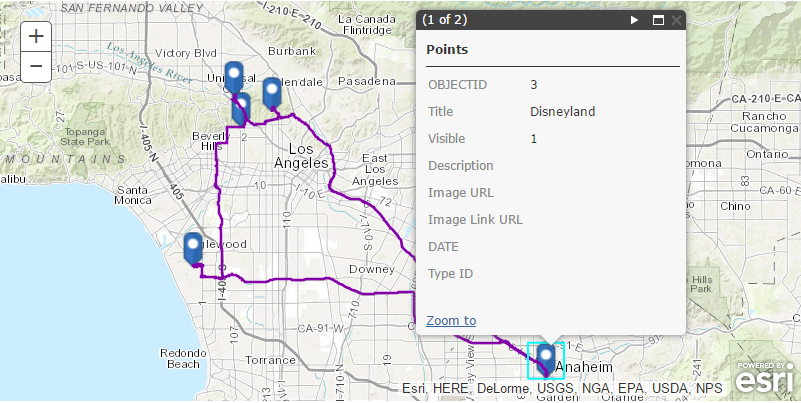</img>

In [ ]:
map3.add_layer(stops_item)

In [ ]:
map3.add_layer(airport_item)

Let us extract the feature data from the items and store them in two `FeatureCollection` objects to be used with the routes tool

In [ ]:
stops_fc = stops_item.layers[3]

In [ ]:
airport_fc = airport_item.layers[3]

### Routing options
In the tool below, `route_count` is 1, since there is just one vehicle carrying the tourists and all tourists need to visit all attractions. In other use cases, when there are multiple vehicles at disposal and not everyone needs to stop at all stops, this parameter can be increased. The `max_stops_per_route` similarly reflects the maximum work load a vehicle can take in a multiple vehicle scenario. The `route_start_time` parameter can be used to plan routes in advance and account for traffic at that time.

In [ ]:
import time
route1 = use_proximity.plan_routes(stops_fc, route_count=1,
                                   max_stops_per_route=5,
                                   route_start_time = time.time(),
                                   start_layer = airport_fc)

Input field [OID] was not mapped to a field in the network analysis class "Orders".
Input field [OID] was not mapped to a field in the network analysis class "Depots".
Network elements with avoid-restrictions are traversed in the output (restriction attribute names: "Through Traffic Prohibited").


Input field [OID] was not mapped to a field in the network analysis class "Orders".
Input field [OID] was not mapped to a field in the network analysis class "Depots".
Network elements with avoid-restrictions are traversed in the output (restriction attribute names: "Through Traffic Prohibited").


We have successfully calculated the route, let us add it back to the map

In [ ]:
map3.add_layer(route1['routes_layer'])